In [1]:
import os
import numpy as np

from datasets import load_dataset
import evaluate
import torch
from transformers import (
    ViTImageProcessor ,
    ViTMSNForImageClassification,
    ViTForImageClassification,
    TrainingArguments,
    Trainer,
    ImageClassificationPipeline,
)
import os
os.environ["WANDB_DISABLED"] = "true"
from PIL import Image

c:\Users\Varun\anaconda3\envs\capstone\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
pretrained_model_name = r"trained_model-msn"

In [33]:
feature_extractor = ViTImageProcessor.from_pretrained(pretrained_model_name)
model = ViTMSNForImageClassification.from_pretrained(
    pretrained_model_name,
    # ignore_mismatched_sizes=True
)
accuracy_metric = evaluate.load("accuracy")

In [21]:
train_dir = "train-dataset"
val_dir   = "val-dataset"
dataset = load_dataset("imagefolder", data_dir="train-dataset")

In [34]:
train_ds = dataset["train"]
val_ds   = dataset["validation"]

In [24]:
labels = train_ds.features["label"].names
num_labels = len(labels)

In [ ]:
head = train_ds.take(5)


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640 at 0x1F4398A7310>, 'label': 0}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640 at 0x1F4398A4C40>, 'label': 0}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640 at 0x1F4398A4970>, 'label': 0}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640 at 0x1F4398A6BF0>, 'label': 0}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640 at 0x1F4398A4730>, 'label': 0}


In [7]:
pipe = ImageClassificationPipeline(model=model, feature_extractor=feature_extractor, device=0)

Device set to use cuda:0


In [35]:
# load image using PIL

image = Image.open(r"train-dataset\train\AD-AZ-60\AD-AZ-60-1-_jpg.rf.7b14b92026d41586c09bd798877c245c.jpg")

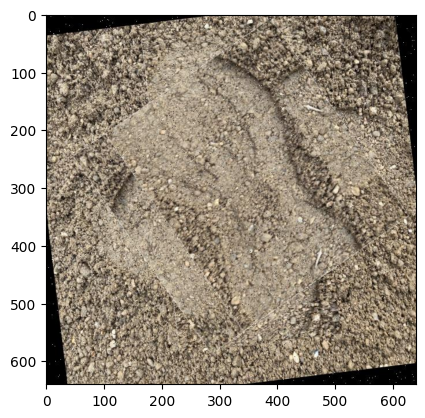

In [36]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [38]:
img_path = r"C:\Users\Varun\Desktop\SEM XII\Capstone\Trial\patch.png"
with torch.no_grad():
    pred = pipe(img_path)
pred

[{'label': '10', 'score': 0.8287258744239807},
 {'label': '17', 'score': 0.13274550437927246},
 {'label': '4', 'score': 0.015879720449447632},
 {'label': '9', 'score': 0.00470717204734683},
 {'label': '0', 'score': 0.003875182243064046}]

In [29]:
for key, value in enumerate(labels):
    print(f"{key}: {value}")

0: AD-AZ-60
1: AD-FC-30
2: AD-OW-35
3: AD-SS-30
4: AD-UT-55
5: BA-BS-50
6: BE-HS-50
7: CO-CH-40
8: DI-DW-50
9: DR-PL-35
10: RP-XX-30
11: RP-XX-35
12: SK-SP-35
13: SL-SL-50
14: SL-SL-55
15: SO-SG-45
16: SO-XX-60
17: SW-XX-60
18: VA-ST-55
